<div style="border-radius:20px; border:#0362fc solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
# ALL LIBERTIES ARE DESCRIBED BELOW.

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as pe
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Dell\AppData\Local\Temp\ipykernel_4132\1805317807.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="border-radius:20px; border:#0362fc solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
# METADATA ABOUT DATASET
    
Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.<br>
Daily Steps: The number of steps the person takes per day.<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [ ]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Sleep Disorder"].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [ ]:
df["Occupation"].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

C:\Users\samri\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



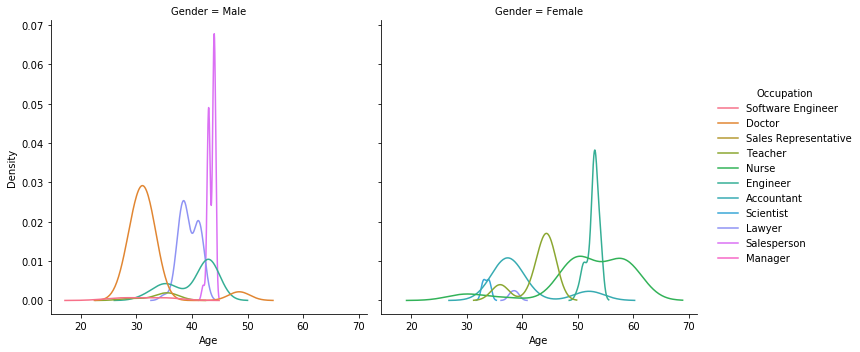

In [ ]:
sns.displot(data=df, x="Age", hue="Occupation", col="Gender", kind="kde");

In [ ]:
import plotly.express as px

# Create an interactive box plot using Plotly Express
fig = px.box(df, x="Age", y="Quality of Sleep", color="Gender",
             category_orders={"Age": sorted(df["Age"].unique())},
             title="Sleep Quality Variation by Age and Gender",
             labels={"Quality of Sleep": "Quality of Sleep"},
             color_discrete_sequence=["#1f77b4", "#ff7f0e"])

# Customize the layout
fig.update_layout(xaxis_title="Age", yaxis_title="Quality of Sleep",
                  xaxis=dict(tickvals=sorted(df["Age"].unique())),
                  xaxis_type='category')

# Show the interactive plot
fig.show()

In [ ]:
import plotly.express as px

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df, x='Stress Level', y='Sleep Duration', title='Stress Levels vs. Sleep Duration',
                 labels={'Stress Level': 'Stress Level', 'Sleep Duration': 'Sleep Duration'},
                 opacity=0.5, trendline='ols')

# Customize the layout
fig.update_layout(xaxis_title="Stress Level", yaxis_title="Sleep Duration")

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px

# Calculate BMI category counts
bmi_counts = df['BMI Category'].value_counts().reset_index()

# Create an interactive bar plot using Plotly Express
fig = px.bar(bmi_counts, x=bmi_counts.index, y='BMI Category', 
             title='Distribution of BMI Categories',
             labels={'x': 'BMI Category', 'y': 'Count'},
             color='BMI Category')

# Customize the layout
fig.update_layout(xaxis_title="BMI Category", yaxis_title="Count",
                  xaxis={'categoryorder': 'total descending'})

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px
import scipy.stats as stats

# Filter data for sleep disorders
with_sleep_disorder = df[df['Sleep Disorder'].notnull() & (df['Sleep Disorder'] != 'None')]['Quality of Sleep']
without_sleep_disorder = df[df['Sleep Disorder'].isnull() | (df['Sleep Disorder'] == 'None')]['Quality of Sleep']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(with_sleep_disorder, without_sleep_disorder, equal_var=False, nan_policy='omit')

# Output t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in sleep quality between groups.")
else:
    print("There is no significant difference in sleep quality between groups.")

# Create an interactive box plot using Plotly Express
fig = px.box(df, x='Sleep Disorder', y='Quality of Sleep', 
             title='Comparison of Sleep Quality by Sleep Disorder',
             labels={'Quality of Sleep': 'Quality of Sleep', 'Sleep Disorder': 'Sleep Disorder'})

# Customize the layout
fig.update_layout(xaxis_title="Sleep Disorder", yaxis_title="Quality of Sleep")

# Show the interactive plot
fig.show()


T-Statistic: -5.9880969268892725
P-Value: 6.878378776179313e-09
There is a significant difference in sleep quality between groups.


In [ ]:
import plotly.express as px

# Calculate average daily steps by occupation
average_steps_by_occupation = df.groupby('Occupation')['Daily Steps'].mean().reset_index()

# Create an interactive bar plot using Plotly Express
fig = px.bar(average_steps_by_occupation, x='Occupation', y='Daily Steps', 
             title='Comparison of Average Daily Steps by Occupation',
             labels={'Daily Steps': 'Average Daily Steps', 'Occupation': 'Occupation'},
             color='Occupation')

# Customize the layout
fig.update_layout(xaxis_title="Occupation", yaxis_title="Average Daily Steps",
                  xaxis={'categoryorder':'total descending'})

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px

# Select numeric columns from the dataset
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create an interactive heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x="Numeric Variables", y="Numeric Variables", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale='Viridis',
                title="Correlation Heatmap")

# Customize the layout
fig.update_layout(xaxis_title="Numeric Variables", yaxis_title="Numeric Variables")

# Show the interactive plot
fig.show()
